importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

importing the dataset
Source: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

In [2]:
disney_df = pd.read_csv('disney_plus_titles.csv')
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [4]:
# missing values
for i in disney_df.columns:
    null_rate = disney_df[i].isna().sum() / len(disney_df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


5 columns have missing values, with Director missing 1/3 of the time

### Transforming datatype, adding columns

In [5]:
# Transforming date_added column into datetime
disney_df["date_added"] = pd.to_datetime(disney_df["date_added"])

In [6]:
#adding column 'season' from column 'duration' if string "min" is not in the row
disney_df['season'] = disney_df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
#adding column 'duration_min' from column 'duration' if string "min" is in the row
disney_df['duration_min'] = disney_df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [7]:
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,duration_min
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,23
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,91
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,23
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,41
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,0


In [8]:
disney_df[['season','duration_min']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        1450 non-null   object
 1   duration_min  1450 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


In [9]:
# Transforming 'season','duration_min' into integer
disney_df["duration_min"] = disney_df["duration_min"].astype("int64")
disney_df["season"] = disney_df["season"].astype("int64")

### Dealing with the missing data

In [10]:
# Replacments
disney_df['country'] = disney_df['country'].fillna(disney_df['country'].mode()[0])
disney_df['cast'].fillna('No Data',inplace  = True)
disney_df['director'].fillna('No Data',inplace  = True)

In [11]:
# Drops
disney_df.dropna(inplace=True)
disney_df.drop(['duration'], axis=1)
# Drop Duplicates
disney_df.drop_duplicates(inplace= True)

In [12]:
# checking if there are still empty rows
disney_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
season          0
duration_min    0
dtype: int64

In [13]:
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,duration_min
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,23
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,91
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,23
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,41
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,0,94


In [14]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1449
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1444 non-null   object        
 1   type          1444 non-null   object        
 2   title         1444 non-null   object        
 3   director      1444 non-null   object        
 4   cast          1444 non-null   object        
 5   country       1444 non-null   object        
 6   date_added    1444 non-null   datetime64[ns]
 7   release_year  1444 non-null   int64         
 8   rating        1444 non-null   object        
 9   duration      1444 non-null   object        
 10  listed_in     1444 non-null   object        
 11  description   1444 non-null   object        
 12  season        1444 non-null   int64         
 13  duration_min  1444 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 169.2+ KB


###  Extracting month, month name and year from 'date_added' column

In [15]:
disney_df['month_added']=disney_df['date_added'].dt.month
disney_df['month_name_added']=disney_df['date_added'].dt.month_name()
disney_df['year_added'] = disney_df['date_added'].dt.year

In [16]:
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,duration_min,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,23,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,91,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,23,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,41,11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,0,94,11,November,2021


### Getting a dataframe for the movies and one for the TV shows

In [17]:
disney_movies_df = disney_df[disney_df.type == 'Movie'].copy()
disney_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,duration_min,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,23,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,0,91,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,23,11,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",0,41,11,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,0,94,11,November,2021


In [18]:
disney_series_df = disney_df[disney_df.type == 'TV Show'].copy()
disney_series_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,duration_min,month_added,month_name_added,year_added
6,s7,TV Show,Hawkeye,No Data,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",United States,2021-11-24,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,1,0,11,November,2021
7,s8,TV Show,Port Protection Alaska,No Data,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,2,0,11,November,2021
8,s9,TV Show,Secrets of the Zoo: Tampa,No Data,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,2,0,11,November,2021
13,s14,TV Show,"Dr. Oakley, Yukon Vet",No Data,"Dr. Michelle Oakley, Zachary Fine",United States,2021-11-17,2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",10,0,11,November,2021
17,s18,TV Show,Disney Fancy Nancy,No Data,"Mia Jenness, Alyson Hannigan, Rob Riggle, Spen...","United States, Canada",2021-11-12,2018,TV-PG,3 Seasons,"Animation, Kids",Nancy makes every day extraordinary!,3,0,11,November,2021


### Exploratory Analysis and Visualization

In [19]:
disney_df.type.value_counts()

Movie      1051
TV Show     393
Name: type, dtype: int64

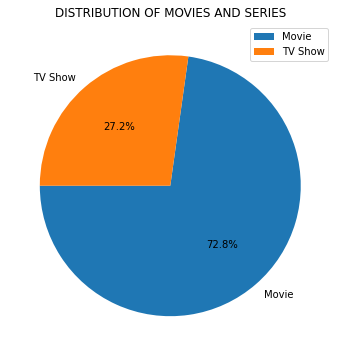

In [20]:
plt.figure(figsize=(12,6))
plt.title("DISTRIBUTION OF MOVIES AND SERIES")
fig = plt.pie(disney_df.type.value_counts(), explode = None, labels= disney_df.type.value_counts().index,autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

This shows that Disney+ acquires more films rather than Tv series.The streaming platform has 72.6% of it's content as movies i.e 990 movies and remaining as series which is 373.

### DISTRIBUTION OF GENRE AMONG MOVIES IN DISNEY+

In [21]:
# analysing the genre of movies and selecting groups with more than 10 movies per genre
movies_gen=disney_movies_df.groupby("listed_in").filter(lambda x: len(x) > 10)

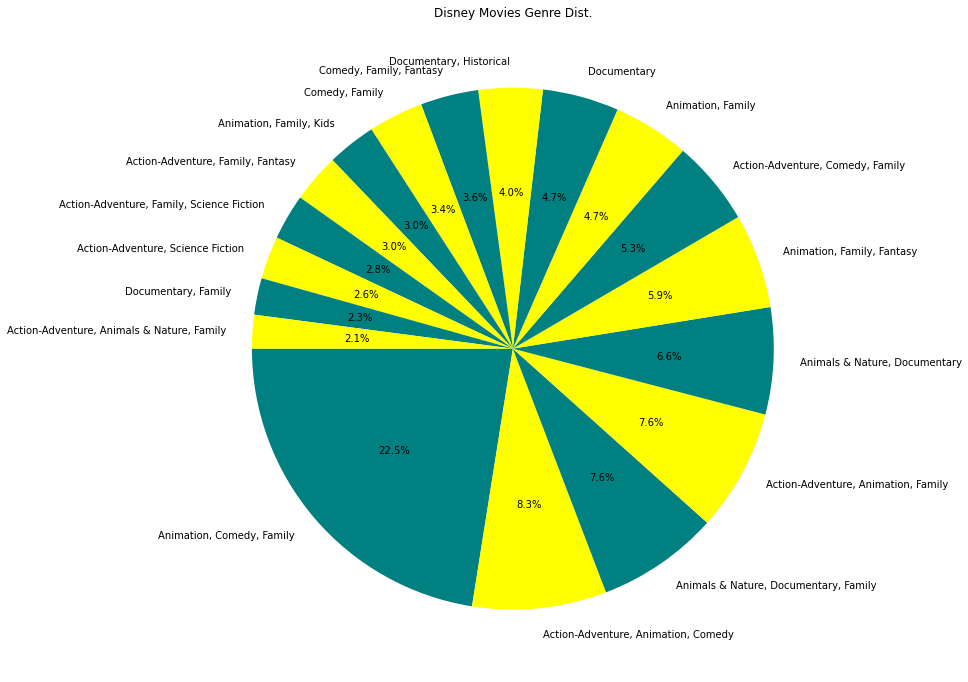

In [22]:
plt.figure(figsize=(12,12))
plt.title('Disney Movies Genre Dist.')
plt.pie(movies_gen.listed_in.value_counts(),labels =movies_gen.listed_in.value_counts().index,colors= ['teal','yellow'],autopct='%1.1f%%', startangle=180);    
#plt.legend()
plt.show()

From this pie chart its evident that most of the movies in disney+ is of "Animation, Comedy, Family" genre (115) followed by "Action-Adventure,Animation, Comedy" genre (42) followed very closely by "Action-Adventure, Animation, Family" (40) and "Animals & Nature, Documentary, Family" (40).

### DISTRIBUTION OF GENRE AMONG TV SERIES IN DISNEY+

In [23]:
disney_series_df.listed_in.value_counts()

Animals & Nature, Docuseries, Family    39
Action-Adventure, Animation, Kids       39
Action-Adventure, Animation, Comedy     33
Animation, Kids                         15
Action-Adventure, Animation, Fantasy    12
                                        ..
Family, Kids                             1
Animals & Nature, Anthology              1
Fantasy, Musical                         1
Anthology, Science Fiction               1
Animals & Nature, Docuseries, Travel     1
Name: listed_in, Length: 134, dtype: int64

In [24]:
# analysing the genre of TV series and selecting groups with more than 7 TV series per genre
series_gen=disney_series_df.groupby("listed_in").filter(lambda x: len(x) > 7)

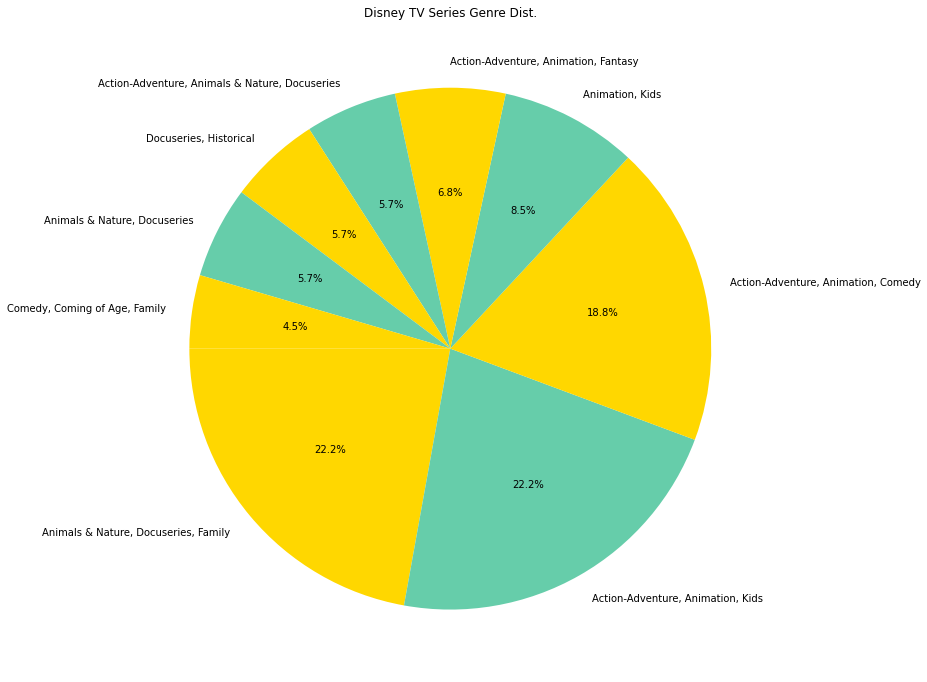

In [25]:
plt.figure(figsize=(12,12))
plt.title('Disney TV Series Genre Dist.')
plt.pie(series_gen.listed_in.value_counts(),
       labels =series_gen.listed_in.value_counts().index ,
       colors= ['gold','mediumaquamarine'],autopct='%1.1f%%', startangle=180);    
#plt.legend()
plt.show()

Action-Adventure, Animation, Kids (39) is the top genre for tv series in disney+ followed by Animals & Nature, Docuseries, Family (38) and Action-Adventure, Animation, Comedy (33)

### FREQUENCY OF RENEWAL OF TV SERIES

In [26]:
renewal = disney_series_df[disney_series_df.season >1]
renewal.season.value_counts()

2     81
3     43
4     24
5     11
7      5
6      3
10     2
9      2
8      2
32     1
16     1
19     1
Name: season, dtype: int64

<BarContainer object of 12 artists>

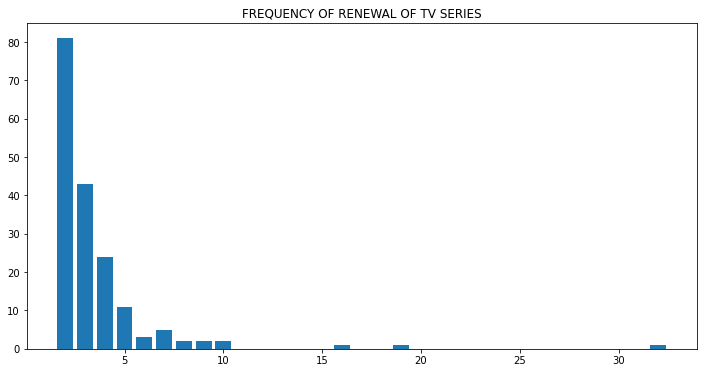

In [27]:
plt.figure(figsize = (12,6))
plt.title("FREQUENCY OF RENEWAL OF TV SERIES")
plt.bar(renewal.season.value_counts().index,
        renewal.season.value_counts())

###  CONTENT ADDED OVER THE YEARS

In [28]:
disney_df['year'] = pd.DatetimeIndex(disney_df['date_added']).year

In [29]:
disney_df.year.value_counts()

2019    765
2020    352
2021    327
Name: year, dtype: int64

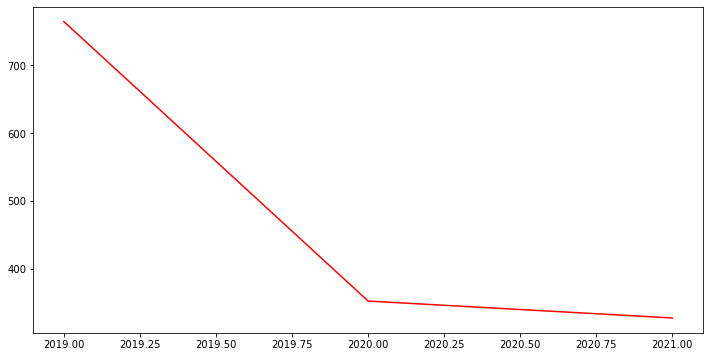

In [30]:
plt.figure(figsize=(12,6))
plt.plot(disney_df.year.value_counts(),c="r");

From this line chart it's clear that due to covid ,shooting of content has been very difficult which led to the steep fall in no. of titles delivered by disney+.

### Country with the highest no. of titles

<BarContainer object of 2 artists>

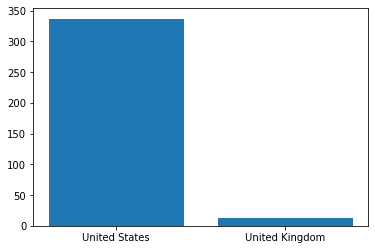

In [31]:
highest_titles =disney_series_df.groupby("country").filter(lambda x: len(x) > 10)
plt.bar(highest_titles.country.value_counts().index,
        highest_titles.country.value_counts())

### Rating of the most produced tv series

<BarContainer object of 5 artists>

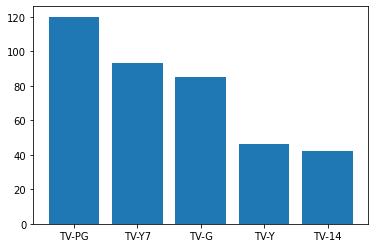

In [32]:
hr = disney_series_df.groupby("rating").filter(lambda x: len(x) > 10)
hr.rating.value_counts()
plt.bar(hr.rating.value_counts().index,hr.rating.value_counts())

### Rating of the most produced movies

<BarContainer object of 7 artists>

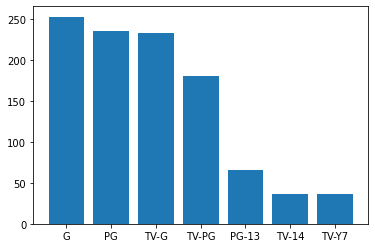

In [37]:
mr = disney_movies_df.groupby("rating").filter(lambda x: len(x) > 10)
mr.rating.value_counts()
plt.bar(mr.rating.value_counts().index,mr.rating.value_counts())

### Top 10 directors on Disney+ with the most releases

In [33]:
disney_df.director[disney_df.director !="No Data"].value_counts()

Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
                    ..
Simon Wells          1
David Lynch          1
Don Bluth            1
Milt Schaffer        1
Mark Waring          1
Name: director, Length: 609, dtype: int64

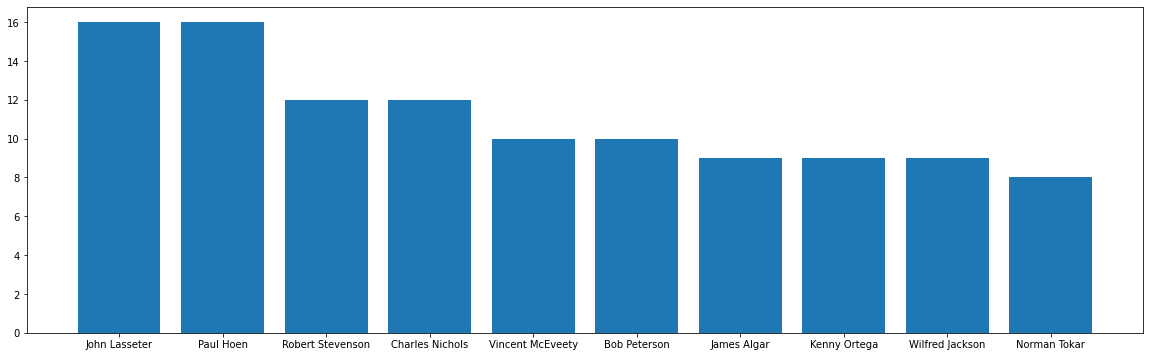

In [34]:
plt.figure(figsize=(20,6))
plt.bar(disney_df.director[disney_df.director !="No Data"].value_counts().index[1:11],
        disney_df.director[disney_df.director !="No Data"].value_counts().values[1:11]);

### Top 5 actors on Disney+ based on number of titles

In [35]:
disney_df.cast[disney_df.cast !="No Data"].value_counts()

Winston Hibler                                                                                    10
Dan Nachtrab                                                                                       7
Larry the Cable Guy , Keith Ferguson                                                               6
Russell Boulter                                                                                    6
Walt Disney                                                                                        4
                                                                                                  ..
Tony Goldwyn, Minnie Driver, Glenn Close, Alex Linz, Rosie O'Donnell, Brian Blessed                1
Robert Downey Jr., Chris Hemsworth, Mark Ruffalo, Chris Evans, Scarlett Johansson, Don Cheadle     1
Walt Disney, Paul Frees, Dr. Ernst Stuhlinger, Dr. Wernher von Braun, Dr. E.C. Slipher             1
Walt Disney, Dick Tufeld, Ward Kimball, Willy Ley, Dr. Heinz Haber, Dr. Wernher von Braun  

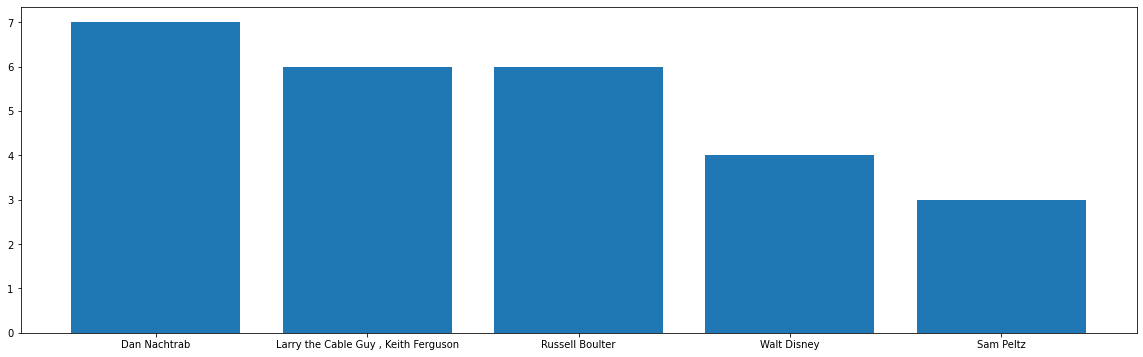

In [36]:
plt.figure(figsize=(20,6))
plt.bar(disney_df.cast[disney_df.cast !="No Data"].value_counts().index[1:6],
        disney_df.cast[disney_df.cast !="No Data"].value_counts().values[1:6]);